# RF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [2]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
436012,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000
436013,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
436014,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [3]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [4]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,0.34,25,83.3,177.148845,0.14,0.7,18000
1,성동구,2016-01-01,75.37,10,0.34,26,83.3,177.148845,0.14,0.7,55200
2,금천구,2016-01-01,84.83,3,0.34,14,83.3,177.148845,0.14,0.7,36800
3,노원구,2016-01-01,84.59,10,0.34,26,83.3,177.148845,0.14,0.7,30300
4,강남구,2016-01-01,50.67,4,0.34,34,83.3,177.148845,0.14,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,4.10,5,105.0,169.662386,0.39,0.2,113500
436012,송파구,2022-12-31,84.71,11,4.10,34,105.0,169.662386,0.39,0.2,138000
436013,송파구,2022-12-31,84.90,24,4.10,14,105.0,169.662386,0.39,0.0,172000
436014,양천구,2022-12-31,64.02,5,4.10,26,105.0,169.662386,0.39,0.4,37000


In [5]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [8]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [9]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.012475052803141621
Test set RMSE: 0.11169177589751907
Test set r2_score : 0.8816633131410493


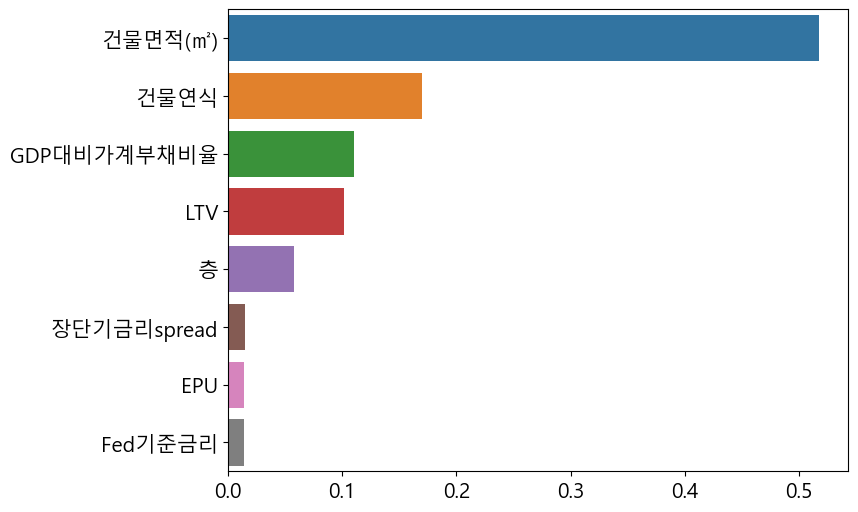

In [10]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB

In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [12]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
436012,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000
436013,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
436014,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [13]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,0.34,25,83.3,177.148845,0.14,0.7,18000
1,성동구,2016-01-01,75.37,10,0.34,26,83.3,177.148845,0.14,0.7,55200
2,금천구,2016-01-01,84.83,3,0.34,14,83.3,177.148845,0.14,0.7,36800
3,노원구,2016-01-01,84.59,10,0.34,26,83.3,177.148845,0.14,0.7,30300
4,강남구,2016-01-01,50.67,4,0.34,34,83.3,177.148845,0.14,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,4.10,5,105.0,169.662386,0.39,0.2,113500
436012,송파구,2022-12-31,84.71,11,4.10,34,105.0,169.662386,0.39,0.2,138000
436013,송파구,2022-12-31,84.90,24,4.10,14,105.0,169.662386,0.39,0.0,172000
436014,양천구,2022-12-31,64.02,5,4.10,26,105.0,169.662386,0.39,0.4,37000


In [14]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [15]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [16]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [17]:
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.012161320454759249
Test set RMSE: 0.1102783770952368
Test set r2_score : 0.8846393363494399


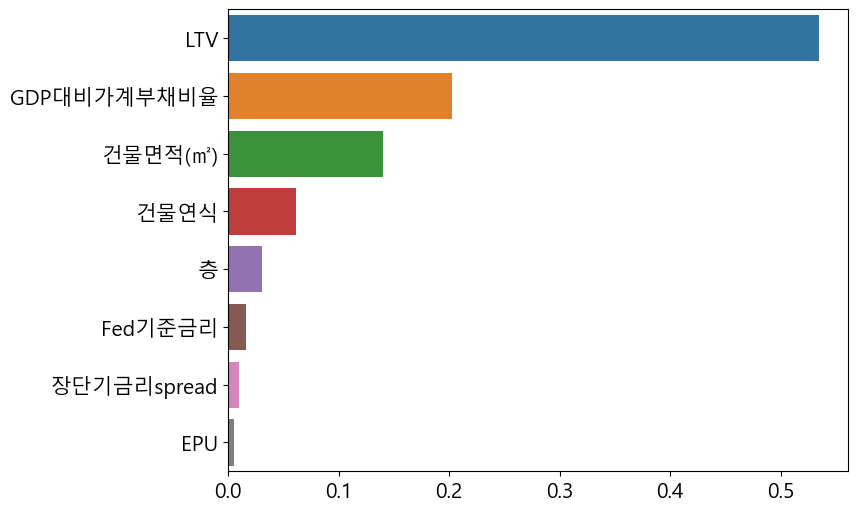

In [18]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DT

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [20]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
436012,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000
436013,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
436014,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [21]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,0.34,25,83.3,177.148845,0.14,0.7,18000
1,성동구,2016-01-01,75.37,10,0.34,26,83.3,177.148845,0.14,0.7,55200
2,금천구,2016-01-01,84.83,3,0.34,14,83.3,177.148845,0.14,0.7,36800
3,노원구,2016-01-01,84.59,10,0.34,26,83.3,177.148845,0.14,0.7,30300
4,강남구,2016-01-01,50.67,4,0.34,34,83.3,177.148845,0.14,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,4.10,5,105.0,169.662386,0.39,0.2,113500
436012,송파구,2022-12-31,84.71,11,4.10,34,105.0,169.662386,0.39,0.2,138000
436013,송파구,2022-12-31,84.90,24,4.10,14,105.0,169.662386,0.39,0.0,172000
436014,양천구,2022-12-31,64.02,5,4.10,26,105.0,169.662386,0.39,0.4,37000


In [22]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [23]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [24]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [25]:
# 결정 나무 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.02254901003855446
Test set RMSE: 0.1501632779295739
Test set r2_score : 0.7861030985584468


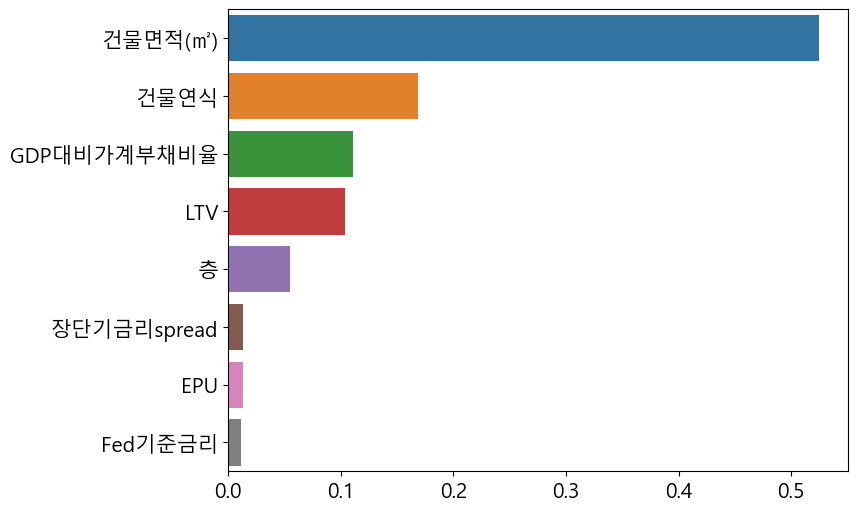

In [26]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()